# ONLINE RETAIL

Link dataset: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II#

Attribute Information:

1. InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.
5. InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
6. UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
7. CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
8. Country: Country name. Nominal. The name of the country where a customer resides.

In [1]:
# load the dataset
import pandas as pd

data1 = pd.read_excel('E:/Data/online_retail_II.xlsx', sheet_name='Year 2009-2010')
data2 = pd.read_excel('E:/Data/online_retail_II.xlsx', sheet_name='Year 2010-2011')

link dataset country: https://www.kaggle.com/tomvebrcz/countriesandcontinents

In [2]:
# load region dataset
country = pd.read_csv('E:/Data/countries.csv')

In [3]:
# check if both datasets have the same column
if list(data1.columns) == list(data2.columns):
    print('two datasets have the same column')
else:
    print('two datasets don not have the same column')

two datasets have the same column


In [4]:
# merge two datasets
data = pd.concat([data1, data2])
data.shape

(1067371, 8)

In [5]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
country.head()

,Country,Region,Population
0,Angola,AFRICA,12127071
1,Benin,AFRICA,7862944
2,Botswana,AFRICA,1639833
3,Burkina Faso,AFRICA,13902972
4,Burundi,AFRICA,8090068


In [7]:
# delete data1 and data 2 to save RAM
del [data1, data2]

In [8]:
# check information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [9]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     227 non-null    object
 1   Region      227 non-null    object
 2   Population  227 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.4+ KB


In [10]:
# check null data in Customer ID
data['Customer ID'].isna().sum()

243007

In [11]:
# delete empty data
data.dropna(subset=['Customer ID'],inplace=True)
data.shape

(824364, 8)

In [12]:
# number of consumers
data['Customer ID'].nunique()

5942

In [13]:
# number of product names
data['Description'].nunique()

5299

In [14]:
# number of country
data['Country'].nunique()

41

In [15]:
country['Region'].unique()

array(['AFRICA', 'ASIA', 'EUROPE', 'LATIN', 'NEAR_EAST',
       'NORTHERN_AMERICA', 'OCEANIA'], dtype=object)

In [16]:
# change index dataset to country name
country = country.set_index('Country')
country.head()

,Region,Population
Country,,
Angola,AFRICA,12127071
Benin,AFRICA,7862944
Botswana,AFRICA,1639833
Burkina Faso,AFRICA,13902972
Burundi,AFRICA,8090068


In [17]:
# Checks whether the name in the dataset "data" is in the index dataset "country"
a = 0
b = []
for i in list(data['Country'].unique()):
    if i in list(country.index):
        a+=1
    else:
        b.append(i)
print(a)
print(b)

33
['USA', 'EIRE', 'Channel Islands', 'Unspecified', 'RSA', 'West Indies', 'Korea', 'European Community']


1. USA = NORTHERN_AMERICA
2. EIRE = EUROPE
3. Channel Islands = EUROPE
4. RSA = AFRICA
5. West Indies = NORTHERN_AMERICA
6. Korea = ASIA

In [18]:
new = {'USA':'NORTHERN_AMERICA','EIRE':'EUROPE','Channel Islands':'EUROPE',
       'RSA':'AFRICA','West Indies':'NORTHERN_AMERICA','Korea':'ASIA'}

In [19]:
c = []
for i in data['Country']:
    if i in list(country.index):
        c.append(country.loc[i]['Region'])
    elif i in list(new.keys()):
        c.append(new[i])
    else:
        c.append('Unspecified')
c

['EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',
 'EUROPE',

In [20]:
# make Region, Date, Time, and Total Price column
data['Region'] = c
data['Date'] = pd.DatetimeIndex(data['InvoiceDate']).date
data['Date'] = pd.to_datetime(data['Date'])
data['Total_Price'] = data['Price']*data['Quantity']
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Region,Date,Total_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,EUROPE,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,EUROPE,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,EUROPE,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,EUROPE,2009-12-01,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,EUROPE,2009-12-01,30.0


In [21]:
data['Region'].unique()

array(['EUROPE', 'NORTHERN_AMERICA', 'OCEANIA', 'ASIA', 'NEAR_EAST',
       'Unspecified', 'AFRICA', 'LATIN'], dtype=object)

In [22]:
# check whether the number of invoice codes containing the letter c is equal to the number of quantities less than 0
len(data[data['Quantity']<=0])==len(data[data["Invoice"].str.contains("C", na=False)])

True

In [23]:
# make canceled order dataset
data_cancel = data[data["Invoice"].str.contains("C", na=False)]
data_cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Region,Date,Total_Price
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,OCEANIA,2009-12-01,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,OCEANIA,2009-12-01,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,OCEANIA,2009-12-01,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,OCEANIA,2009-12-01,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,OCEANIA,2009-12-01,-35.40
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,EUROPE,2011-12-09,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,EUROPE,2011-12-09,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,EUROPE,2011-12-09,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,EUROPE,2011-12-09,-1.25


In [24]:
# group data by date and region
groupby_region = data_cancel.groupby(['Date','Region']).agg({
    'Invoice': 'nunique','StockCode': 'nunique','Description': 'nunique', 'Total_Price': sum})
groupby_region.columns = ['Invoice','StockCode','Description','Price']
groupby_region.head(10)

Invoice  StockCode  Description    Price
Date       Region                                           
2009-12-01 EUROPE        38         92           92 -1144.37
           OCEANIA        1          9            9  -196.10
2009-12-02 ASIA           1          3            3  -208.75
           EUROPE         9         10           10  -155.05
2009-12-03 EUROPE        15         38           38 -5944.86
2009-12-04 EUROPE        13         23           23  -377.55
2009-12-06 EUROPE        16         27           27  -296.44
2009-12-07 EUROPE        13         31           31  -725.33
           OCEANIA        1          2            2   -21.00
2009-12-08 EUROPE        55        180          180 -5770.34

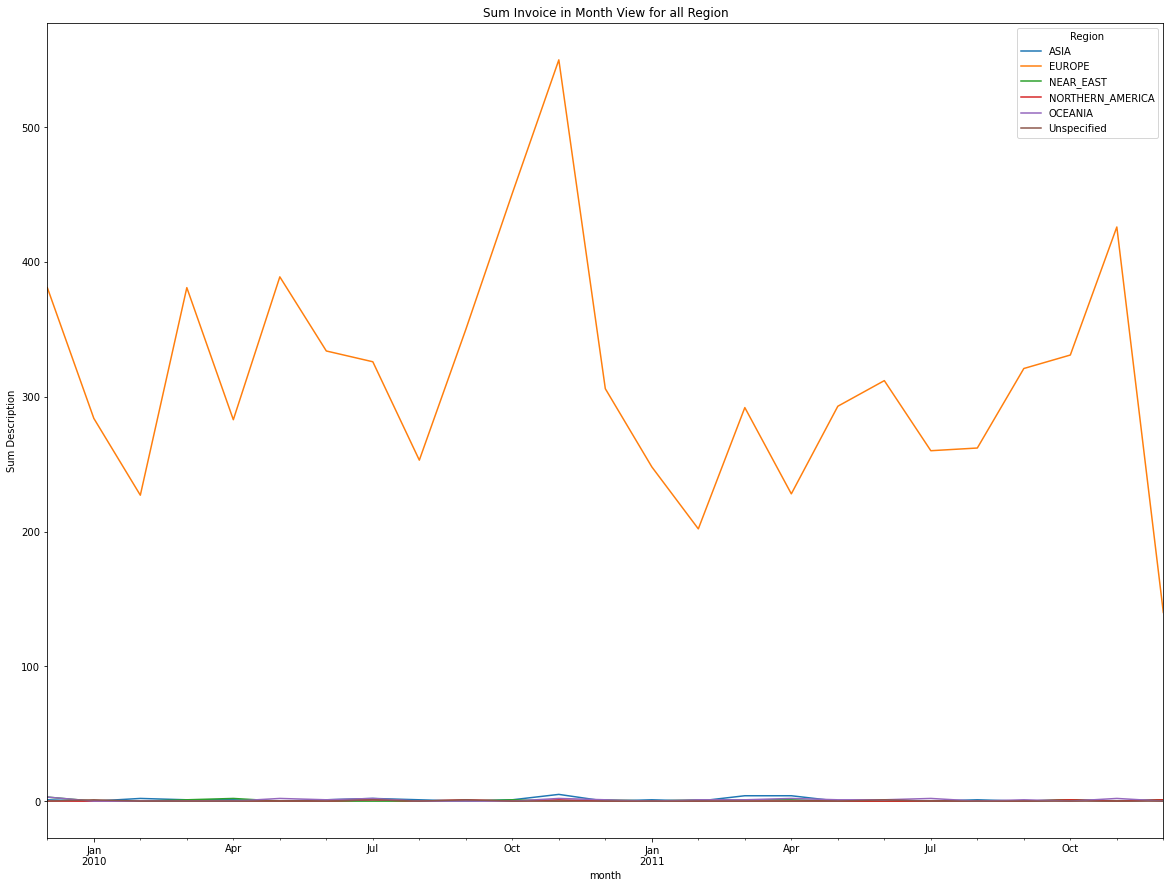

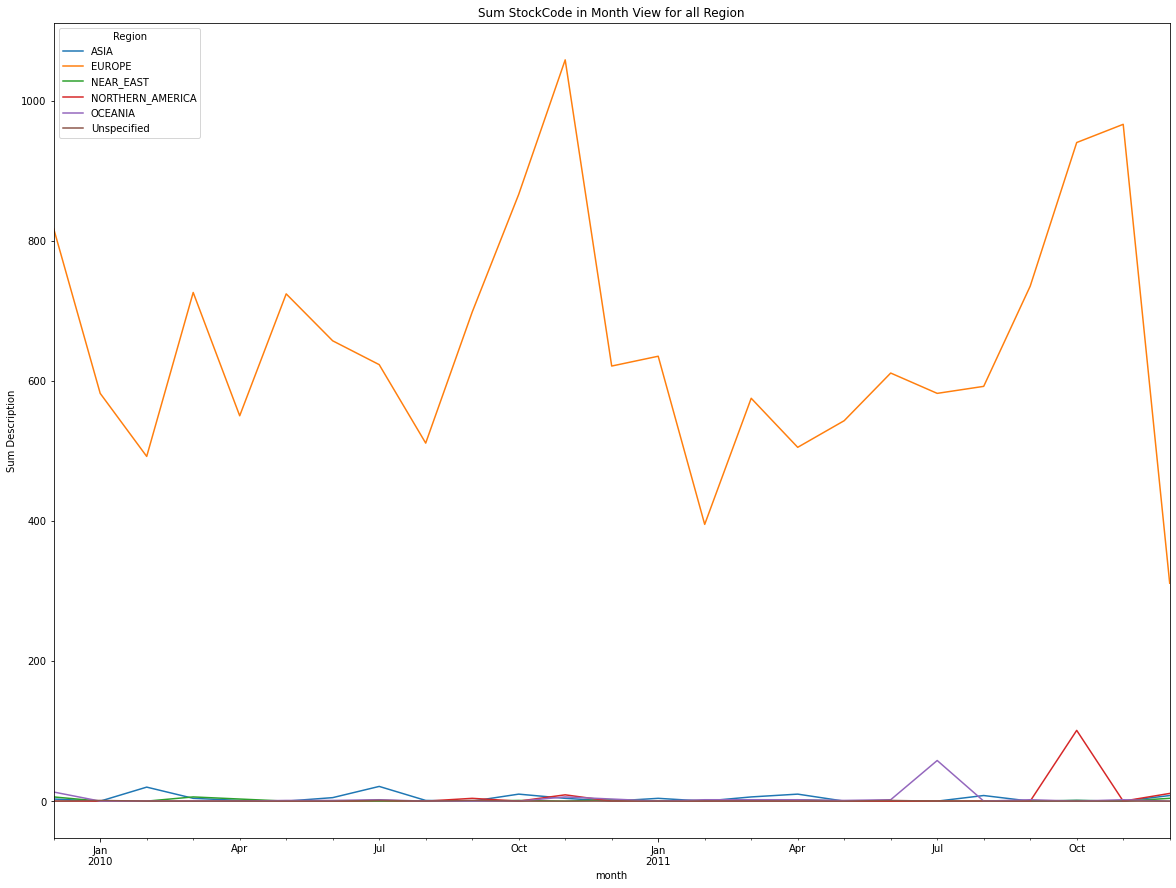

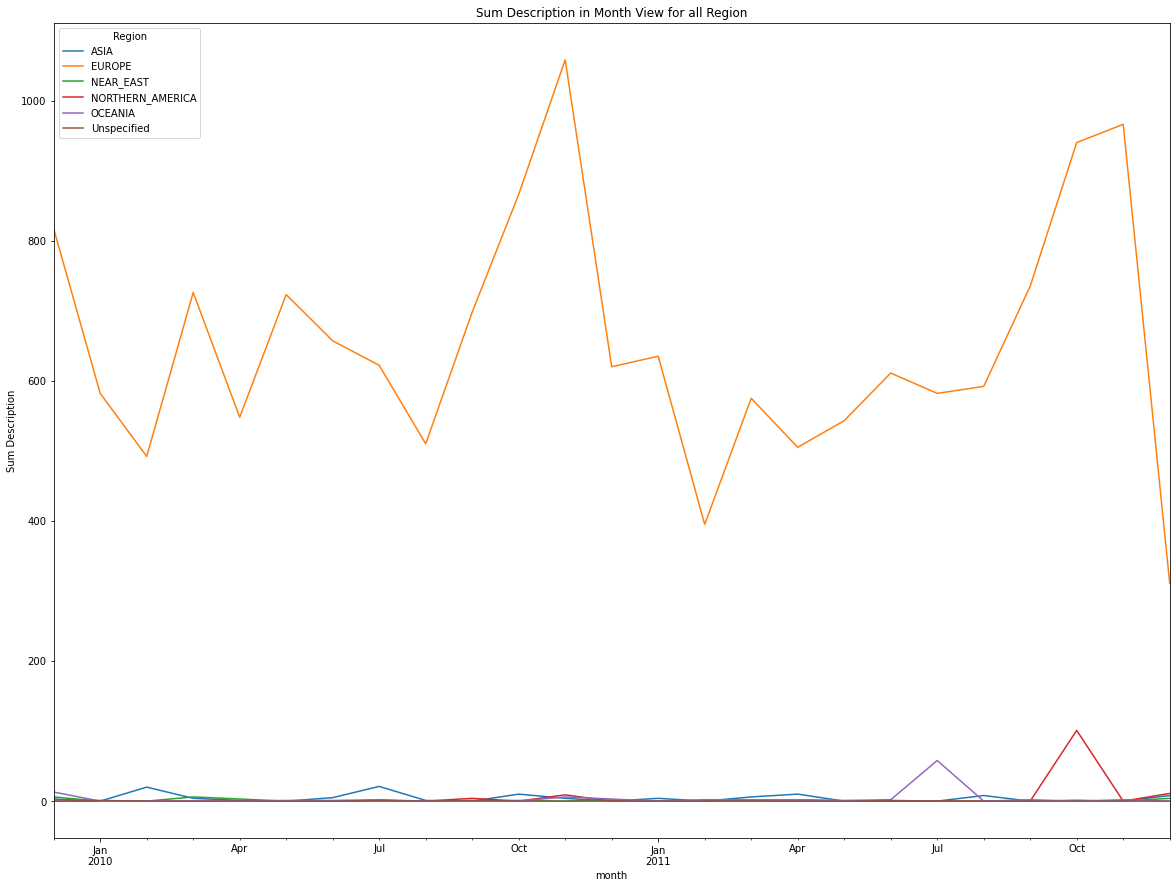

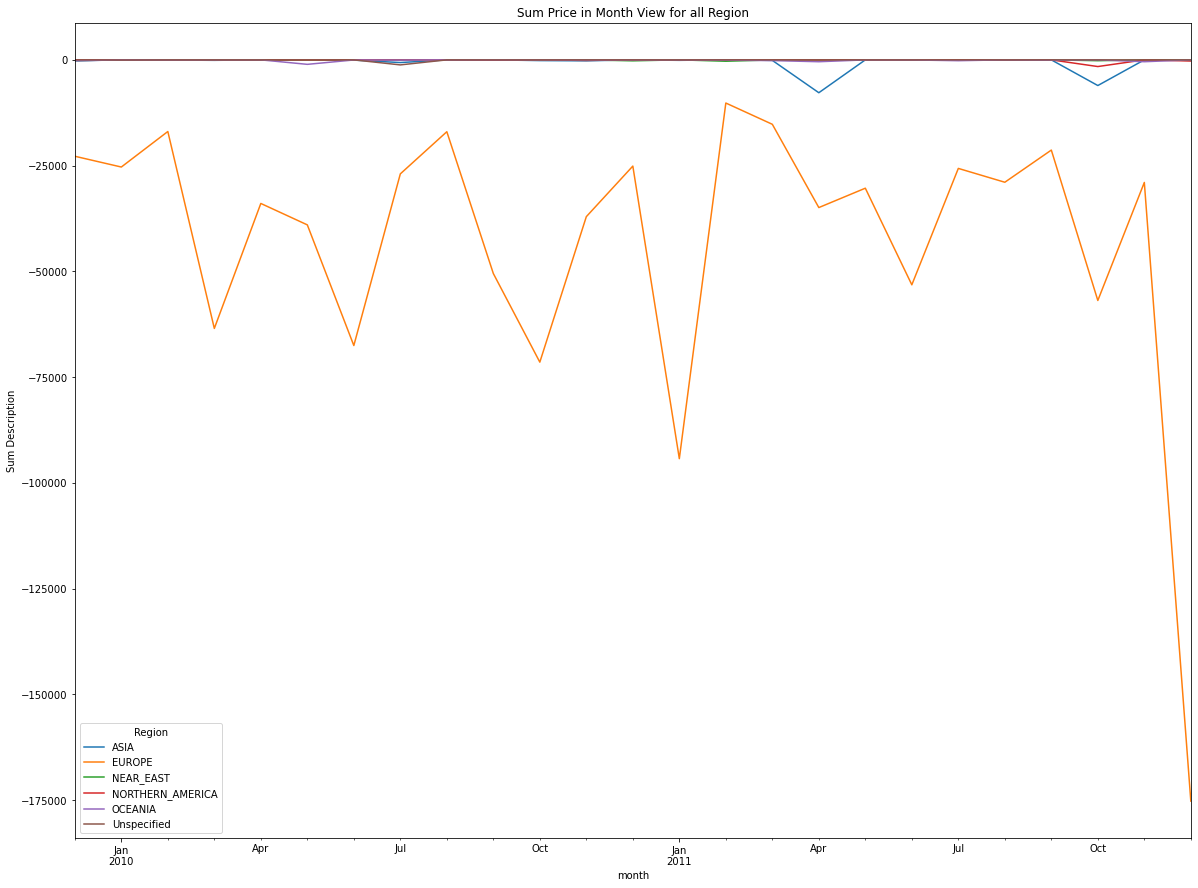

In [25]:
# unstack to get date in row and region in column
unstack_region = groupby_region.unstack('Region').fillna(0)

import matplotlib.pyplot as plt

idx = pd.IndexSlice
for i in groupby_region.columns:
    # Select a column by slicing the data
    by_description = unstack_region.loc[:,idx[i]]
    # Resampling the data for monthly calculations
    by_description_mountly_sum = by_description.resample('M').sum()
    # Visualization
    by_description_mountly_sum.plot(figsize = (20,15),
                                    title = f'Sum {i} in Month View for all Region')
    plt.ylabel('Sum Description')
    plt.xlabel('month')
    plt.show()

In [26]:
# make order data
data_order = data[~data["Invoice"].str.contains("C", na=False)]
# retrieve data whose total price is more than 0
data_order = data_order[data_order['Total_Price']>0]
data_order

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Region,Date,Total_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,EUROPE,2009-12-01,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,EUROPE,2009-12-01,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,EUROPE,2009-12-01,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,EUROPE,2009-12-01,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,EUROPE,2009-12-01,30.00
...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,EUROPE,2011-12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,EUROPE,2011-12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,EUROPE,2011-12-09,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,EUROPE,2011-12-09,14.85


In [27]:
# group data by date and region
groupby_region = data_order.groupby(['Date','Region']).agg({
    'Invoice': 'nunique','StockCode': 'nunique','Description': 'nunique', 'Total_Price': sum})
groupby_region.columns = ['Invoice','StockCode','Description','Price']
groupby_region.head(10)

Invoice  StockCode  Description     Price
Date       Region                                                     
2009-12-01 EUROPE                 96       1038         1039  43711.59
           NORTHERN_AMERICA        1          1            1    141.00
           OCEANIA                 1          9            9    196.10
2009-12-02 EUROPE                110       1087         1089  52941.99
2009-12-03 EUROPE                122       1082         1079  67479.08
2009-12-04 EUROPE                 80       1006         1004  34064.41
2009-12-05 EUROPE                 29        261          260   9042.36
           NEAR_EAST               1         32           32    760.69
2009-12-06 EUROPE                 72        961          959  24580.72
2009-12-07 EUROPE                 94        927          925  33169.63

In [28]:
# unstack to get date in row and region in column
unstack_region = groupby_region.unstack('Region').fillna(0)
unstack_region.head(10)

Invoice                                                       \
Region      AFRICA ASIA EUROPE LATIN NEAR_EAST NORTHERN_AMERICA OCEANIA   
Date                                                                      
2009-12-01     0.0  0.0   96.0   0.0       0.0              1.0     1.0   
2009-12-02     0.0  0.0  110.0   0.0       0.0              0.0     0.0   
2009-12-03     0.0  0.0  122.0   0.0       0.0              0.0     0.0   
2009-12-04     0.0  0.0   80.0   0.0       0.0              0.0     0.0   
2009-12-05     0.0  0.0   29.0   0.0       1.0              0.0     0.0   
2009-12-06     0.0  0.0   72.0   0.0       0.0              0.0     0.0   
2009-12-07     0.0  0.0   94.0   0.0       0.0              0.0     0.0   
2009-12-08     0.0  0.0  102.0   0.0       0.0              0.0     0.0   
2009-12-09     0.0  0.0   77.0   0.0       0.0              0.0     0.0   
2009-12-10     0.0  0.0   86.0   0.0       1.0              0.0     0.0   

                       StockCode       ... Description              Price  \
Region     Unspecified    AFRICA ASIA  ...     OCEANIA Unspecified AFRICA   
Date                                   ...                                  
2009-12-01         0.0       0.0  0.0  ...         9.0         0.0    0.0   
2009-12-02         0.0       0.0  0.0  ...         0.0         0.0    0.0   
2009-12-03         0.0       0.0  0.0  ...         0.0         0.0    0.0   
2009-12-04         0.0       0.0  0.0  ...         0.0         0.0    0.0   
2009-12-05         0.0       0.0  0.0  ...         0.0         0.0    0.0   
2009-12-06         0.0       0.0  0.0  ...         0.0         0.0    0.0   
2009-12-07         0.0       0.0  0.0  ...         0.0         0.0    0.0   
2009-12-08         0.0       0.0  0.0  ...         0.0         0.0    0.0   
2009-12-09         0.0       0.0  0.0  ...         0.0         0.0    0.0   
2009-12-10         0.0       0.0  0.0  ...         0.0         0.0    0.0   

                                                                                
Region     ASIA    EUROPE LATIN NEAR_EAST NORTHERN_AMERICA OCEANIA Unspecified  
Date                                                                            
2009-12-01  0.0  43711.59   0.0      0.00            141.0   196.1         0.0  
2009-12-02  0.0  52941.99   0.0      0.00              0.0     0.0         0.0  
2009-12-03  0.0  67479.08   0.0      0.00              0.0     0.0         0.0  
2009-12-04  0.0  34064.41   0.0      0.00              0.0     0.0         0.0  
2009-12-05  0.0   9042.36   0.0    760.69              0.0     0.0         0.0  
2009-12-06  0.0  24580.72   0.0      0.00              0.0     0.0         0.0  
2009-12-07  0.0  33169.63   0.0      0.00              0.0     0.0         0.0  
2009-12-08  0.0  44804.34   0.0      0.00              0.0     0.0         0.0  
2009-12-09  0.0  31113.60   0.0      0.00              0.0     0.0         0.0  
2009-12-10  0.0  38288.66   0.0    517.70              0.0     0.0         0.0  

[10 rows x 32 columns]

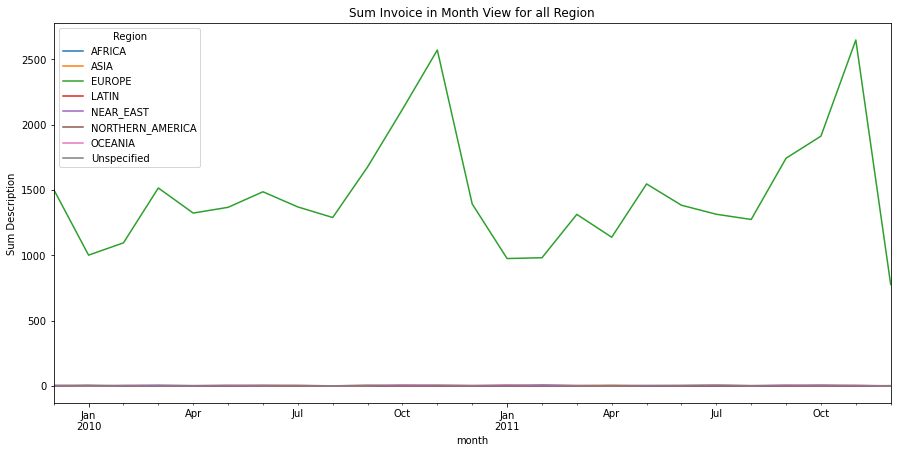

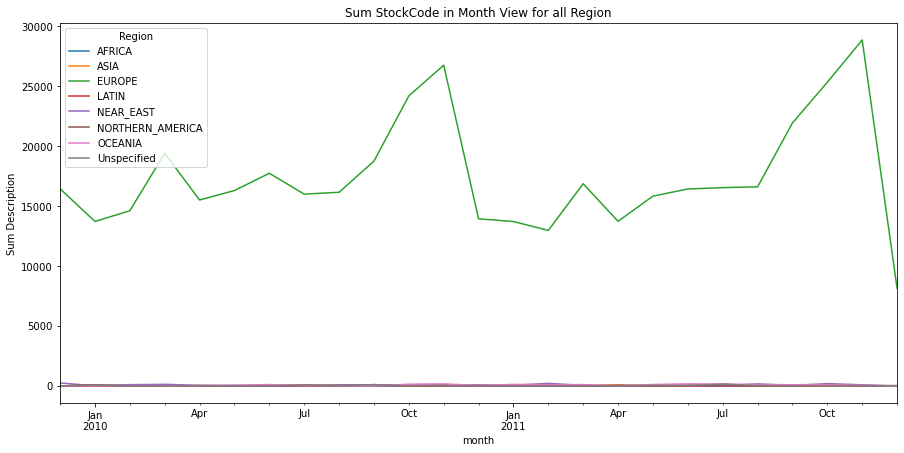

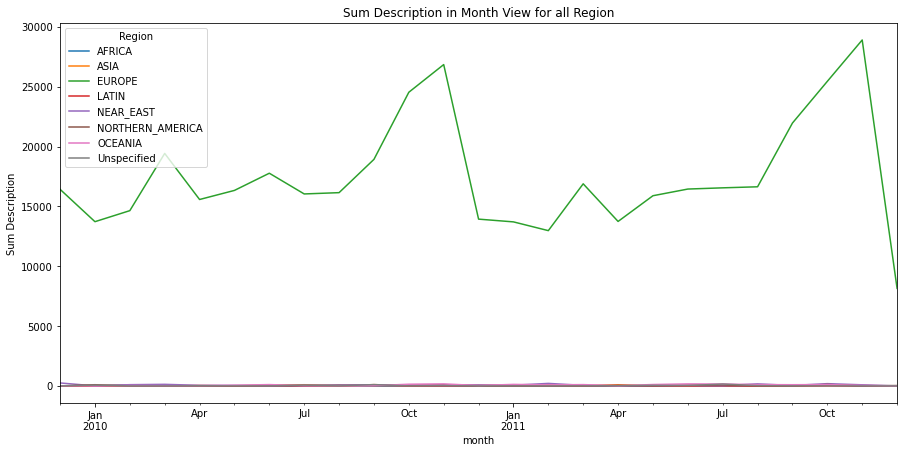

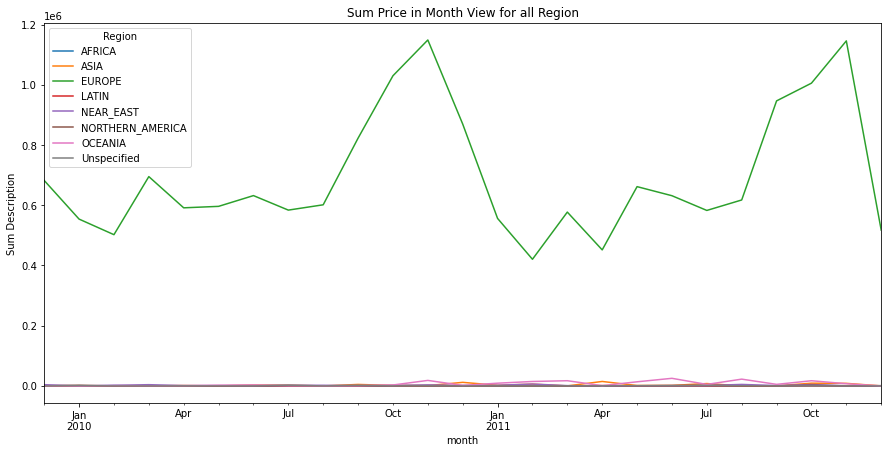

In [29]:
idx = pd.IndexSlice
for i in groupby_region.columns:
    # Select a column by slicing the data
    by_description = unstack_region.loc[:,idx[i]]
    # Resampling the data for monthly calculations
    by_description_mountly_sum = by_description.resample('M').sum()
    # Visualization
    by_description_mountly_sum.plot(figsize = (15,7),
                                    title = f'Sum {i} in Month View for all Region')
    plt.ylabel('Sum Description')
    plt.xlabel('month')
    plt.show()

In [30]:
# group data by country
groupby_country = data_order.groupby(['Country']).agg({
    'Invoice': 'nunique','StockCode': 'nunique','Description': 'nunique'})
groupby_country.columns = ['Invoice','StockCode','Description']
groupby_country.head(10)

,Invoice,StockCode,Description
Country,,,
Australia,95,789,833
Austria,45,549,591
Bahrain,4,52,52
Belgium,149,989,1080
Brazil,2,91,90
Canada,8,215,215
Channel Islands,55,777,826
Cyprus,37,829,846
Czech Republic,2,25,25


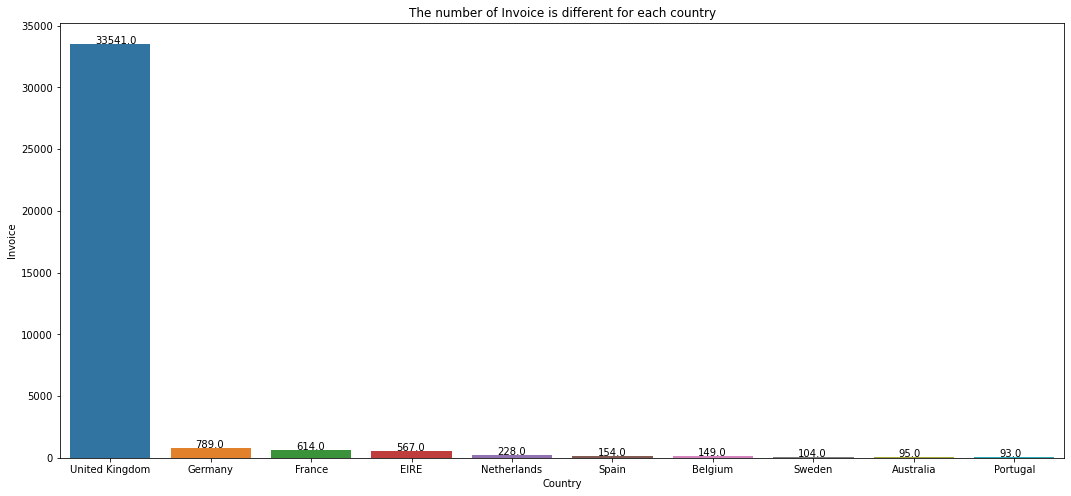

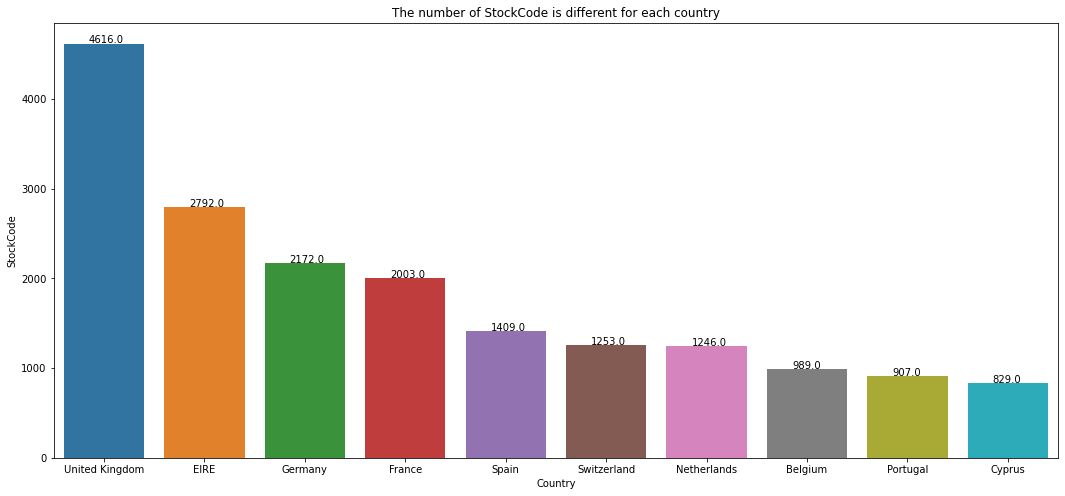

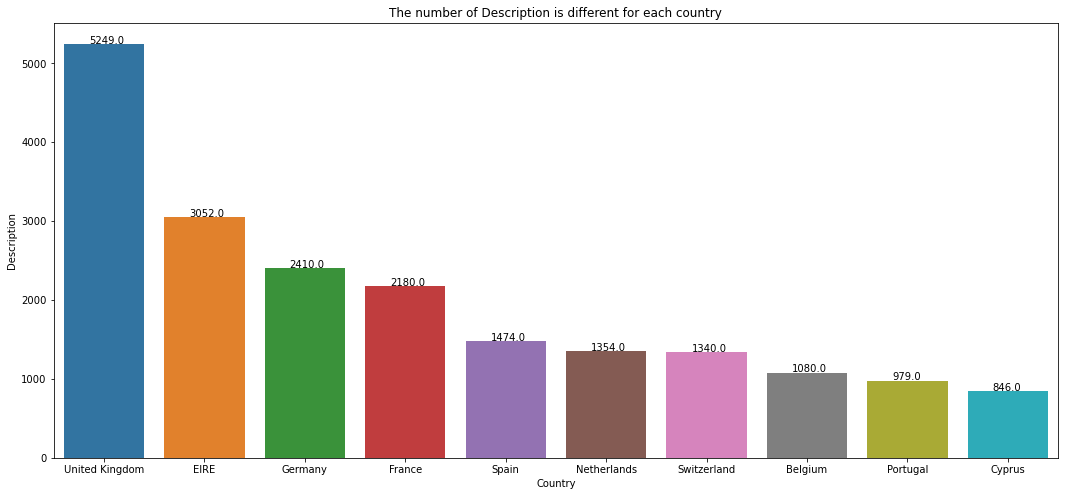

In [31]:
import seaborn as sns

for i in groupby_country.columns:
    plt.figure(figsize = (18,8))
    Invoice = pd.DataFrame(groupby_country[i].sort_values(ascending=False).iloc[:10])
    ax = sns.barplot(y=i, x=Invoice.index, data=Invoice)
    
    for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))
    
    plt.title(f'The number of {i} is different for each country')

# RFM Model

RFM segmentation categorizes your customers into different segments, according to their interactions with your website, which will allow you to subsequently approach these groups in the most effective way.

RFM stands for the three dimensions:

1. Recency – How recently did the customer purchase?
2. Frequency – How often do they purchase?
3. Monetary Value – How much do they spend?

In [32]:
# the last date of purchase
data_order["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [33]:
# make sure that none of the Recency values become zero
import datetime as dt
today_date = dt.datetime(2011, 12, 11)

In [34]:
rfm = data_order.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                             'Invoice': lambda Invoice: Invoice.nunique(),
                                             'Total_Price': lambda Total_Price: Total_Price.sum()})
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,326,12,77556.46
12347.0,3,8,5633.32
12348.0,76,5,2019.40
12349.0,19,4,4428.69
12350.0,311,1,334.40


In [35]:
rfm.describe()

,recency,frequency,monetary
count,5878.000000,5878.000000,5878.000000
mean,201.866791,6.289384,3018.616737
std,209.353961,13.009406,14737.731040
min,1.000000,1.000000,2.950000
25%,26.000000,1.000000,348.762500
50%,96.000000,3.000000,898.915000
75%,380.000000,7.000000,2307.090000
max,739.000000,398.000000,608821.650000


## RFM Model Using Quartiles

In [36]:
# making score on recency, frequency, and monetary
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm["rfm_score"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) +
                   rfm["monetary_score"].astype(str))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
Customer ID,,,,,,,
12346.0,326,12,77556.46,2,5,5,255
12347.0,3,8,5633.32,5,4,5,545
12348.0,76,5,2019.40,3,4,4,344
12349.0,19,4,4428.69,5,3,5,535
12350.0,311,1,334.40,2,1,2,212


11 segments on consumers refer to the following sources. https://docs.exponea.com/docs/rfm-segmentation

In [37]:
# 11 segments on consuments
Champions = ['555', '554', '544', '545', '454', '455', '445']
Loyal = ['543', '444', '435', '355', '354', '345', '344', '335']
Potential_Loyalist = ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', 
                      '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323']
New_Costumers = ['512', '511', '422', '421', '412', '411', '311']
Promising = ['525', '524', '523', '522', '521', '515', '514', '513',
             '425','424', '413','414','415', '315', '314', '313']
Need_Attention = ['535', '534', '443', '434', '343', '334', '325', '324']
About_To_Sleep = ['331', '321', '312', '221', '213', '231', '241', '251']
At_Risk = ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', 
           '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124']
Cannot_Lose_Them = ['155', '154', '144', '214','215','115', '114', '113']
Hibernating_Customers = ['332', '322', '231', '241', '251', '233', '232', '223', '222', '132', '123', '122', '212', '211']
Lose_Customers = ['111', '112', '121', '131','141','151']

A = []

for i in rfm['rfm_score']:
    if i in Champions:
        A.append('Champions')
    elif i in Loyal:
        A.append('Loyal')
    elif i in Potential_Loyalist:
        A.append('Potential_Loyalist')
    elif i in New_Costumers:
        A.append('New_Costumers')
    elif i in Promising:
        A.append('Promising')
    elif i in Need_Attention:
        A.append('Need_Attention')
    elif i in About_To_Sleep:
        A.append('About_To_Sleep')
    elif i in At_Risk:
        A.append('At_Risk')
    elif i in Cannot_Lose_Them:
        A.append('Cannot_Lose_Them')
    elif i in Hibernating_Customers:
        A.append('Hibernating_Customers')
    elif i in Lose_Customers:
        A.append('Lose_Customers')
    else:
        A.append('None')

rfm['segment'] = A
rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment
Customer ID,,,,,,,,
12346.0,326,12,77556.46,2,5,5,255,At_Risk
12347.0,3,8,5633.32,5,4,5,545,Champions
12348.0,76,5,2019.40,3,4,4,344,Loyal
12349.0,19,4,4428.69,5,3,5,535,Need_Attention
12350.0,311,1,334.40,2,1,2,212,Hibernating_Customers
...,...,...,...,...,...,...,...,...
18283.0,4,22,2736.65,5,5,4,554,Champions
18284.0,432,1,461.68,1,2,2,122,Hibernating_Customers
18285.0,661,1,427.00,1,2,2,122,Hibernating_Customers


In [38]:
rfm_out=pd.DataFrame(rfm['segment'].value_counts())
rfm_out

,segment
Champions,1151
Hibernating_Customers,1020
Lose_Customers,662
Loyal,658
Potential_Loyalist,609
At_Risk,516
New_Costumers,343
Need_Attention,339
About_To_Sleep,304
Promising,172


In [39]:
rfm_out.index

Index(['Champions', 'Hibernating_Customers', 'Lose_Customers', 'Loyal',
       'Potential_Loyalist', 'At_Risk', 'New_Costumers', 'Need_Attention',
       'About_To_Sleep', 'Promising', 'Cannot_Lose_Them'],
      dtype='object')

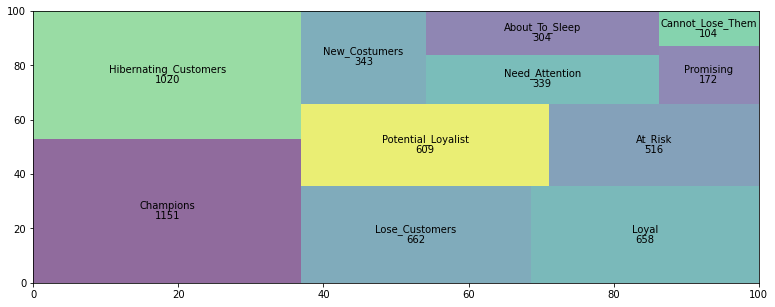

In [51]:
# treemap chart
import squarify

plt.figure(figsize = (13,5))
squarify.plot(sizes=rfm_out['segment'], label=rfm_out.index, alpha=0.6, value=rfm_out['segment'])
plt.show()

<ipython-input-41-578fcda6e676>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(rfm_out, labels = rfm_out.index, colors = colors, autopct='%.2f%%')


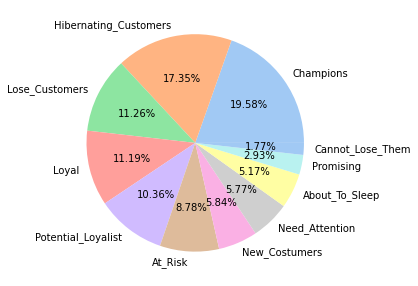

In [41]:
# define Seaborn color palette to use
colors = sns.color_palette('pastel')

plt.figure(figsize = (10,5))
# create pie chart
plt.pie(rfm_out, labels = rfm_out.index, colors = colors, autopct='%.2f%%')
plt.show()

## RFM Model Using K-Means

In [42]:
X = rfm[['recency', 'frequency', 'monetary']]

# create a scaler object

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the inputs 
scaler.fit(X)
X_scaled = scaler.transform(X)

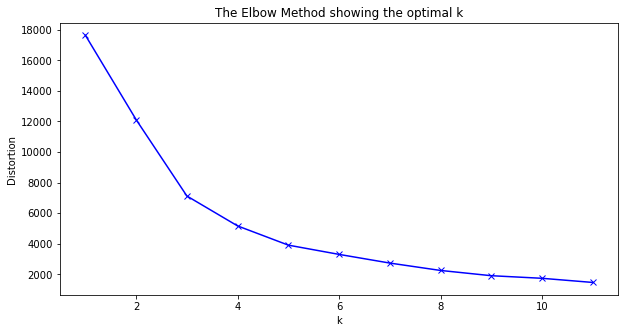

In [43]:
# elbow method
from sklearn.cluster import KMeans
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [44]:
import sklearn.metrics as metrics
for i in range(2,12):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=42).fit(X_scaled).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X_scaled,labels,metric="euclidean",sample_size=1000,random_state=42)))

Silhouette score for k(clusters) = 2 is 0.9299893324826752
Silhouette score for k(clusters) = 3 is 0.5795285348093339
Silhouette score for k(clusters) = 4 is 0.5919067662659343
Silhouette score for k(clusters) = 5 is 0.6056269954207231
Silhouette score for k(clusters) = 6 is 0.5515485130013048
Silhouette score for k(clusters) = 7 is 0.5522383105007568
Silhouette score for k(clusters) = 8 is 0.5418527182535244
Silhouette score for k(clusters) = 9 is 0.5414536475645513
Silhouette score for k(clusters) = 10 is 0.5091420441174352
Silhouette score for k(clusters) = 11 is 0.5013511272485482


In [45]:
# kmeans
kmeans = KMeans(n_clusters=2).fit(X_scaled)
print('Silhouette Coefficient for kmeans: {}'.format(metrics.silhouette_score(X_scaled, kmeans.labels_, 
                                           metric='euclidean')))

Silhouette Coefficient for kmeans: 0.9163506547916832


In [46]:
X['cluster']=kmeans.labels_
X.head()

<ipython-input-46-37a8def8a15f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster']=kmeans.labels_


,recency,frequency,monetary,cluster
Customer ID,,,,
12346.0,326,12,77556.46,0
12347.0,3,8,5633.32,0
12348.0,76,5,2019.40,0
12349.0,19,4,4428.69,0
12350.0,311,1,334.40,0


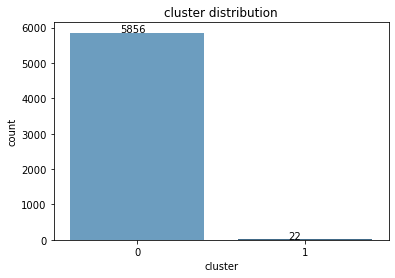

In [47]:
# cluster distribution

ax= sns.countplot(x='cluster', data=X, palette="Blues_d")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

plt.title('cluster distribution')
plt.show()

In [48]:
df =X.groupby('cluster').mean()
df

,recency,frequency,monetary
cluster,,,
0,202.536714,5.775615,2366.659960
1,23.545455,143.045455,176557.656818


Based on this average, it can be seen that cluster 1 is champions while 0 means not champions

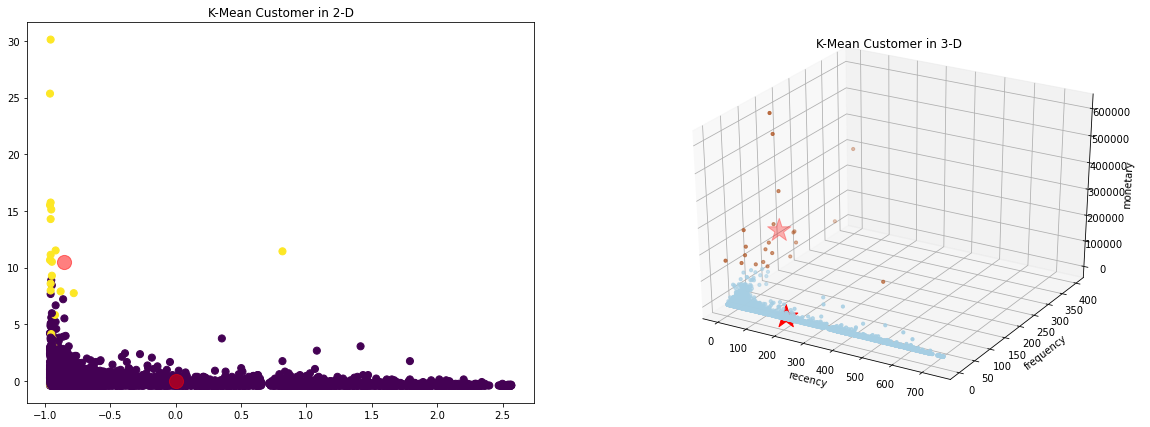

In [49]:
fig = plt.figure(figsize=(20, 7))

d2 = fig.add_subplot(1, 2, 1)
y_kmeans = kmeans.predict(X_scaled)
d2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
d2.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
d2.set_title('K-Mean Customer in 2-D')

d3 = fig.add_subplot(1, 2, 2, projection='3d')
d3.scatter(X['recency'], X['frequency'], X['monetary'], c=kmeans.predict(X_scaled), s=10, cmap='Paired')
d3.scatter(df['recency'], df['frequency'], df['monetary'], marker='*', c='red', s=600)
d3.set_xlabel('recency')
d3.set_ylabel('frequency')
d3.set_zlabel('monetary')
d3.set_title('K-Mean Customer in 3-D')


plt.show()